<a href="https://colab.research.google.com/github/arifuddinatif/search-query-optimization/blob/main/Search_query_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%shell
jupyter nbconvert --to html /content/NetworthCorpAssignmentSubmission_Mohammed_Arifuddin_Atif.ipynb

[NbConvertApp] Converting notebook /content/NetworthCorpAssignmentSubmission_Mohammed_Arifuddin_Atif.ipynb to html
[NbConvertApp] Writing 766615 bytes to /content/NetworthCorpAssignmentSubmission_Mohammed_Arifuddin_Atif.html


In [ ]:
# mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [ ]:
# reading product description data
df_pd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/customer raw data/Product Description.csv')

# reading product performance data
df_pp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/customer raw data/product performance.csv')

# reading query performance data
df_qp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/customer raw data/query performance.csv')

#Exploratory data analysis

In [ ]:
# product description data

df_pd.head()

,PID,Product Name,Category,Final Price,Initial Price,Color,Primary Color,Fabric
0,CL0036386,Ikat stripe print cotton knit dress,Dress,84.95,33.95,Blue/navy/white,Blue,Cotton Spandex
1,CL0030567,Feminine pleated knit dress,Dress,59.95,41.95,Navy blue,Navy blue,Cotton Spandex
2,CL0032320,Floral embellished chambray denim maxi dress,Dress,96.95,67.95,Deep indigo,Deep indigo,Cotton
3,CL0036700,Dot print cap sleeve shirt,Top,49.95,19.95,White/navy,White,Cotton
4,CL0036365,Layered asymmetric hem hacci knit top,Top,69.95,27.95,Blue,Blue,Polyester


----- The product details given to us are about clothes, as we can see from the product name and category types. To get an appropriate search result for clothes, factors like category of clothes, color, price are considered in a search result.

In [ ]:
# basic detals about the data

df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            716 non-null    object 
 1   Product Name   716 non-null    object 
 2   Category       716 non-null    object 
 3   Final Price    716 non-null    float64
 4   Initial Price  716 non-null    float64
 5   Color          716 non-null    object 
 6   Primary Color  716 non-null    object 
 7   Fabric         716 non-null    object 
dtypes: float64(2), object(6)
memory usage: 44.9+ KB


In [ ]:
df_pd['Category'].nunique() , df_pd['Category'].unique()

(6, array([' Dress', ' Top', ' Skirt', ' Pant', ' Jacket', ' Jumpsuit'],
       dtype=object))

----- We can observe from above that there are 6 category types from our dataset. These category types play an important role in optimizing our search results. We can use this information to rank the search results accordingly to produce appropriate search results for the customers.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


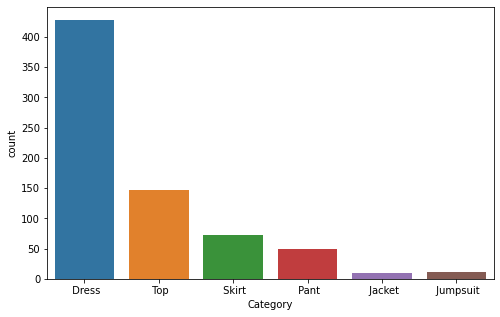

In [ ]:
# getting insights about the 'category' column

plt.figure(figsize=(8,5))
sns.countplot(df_pd.Category)

----- From above we can see that 'Dress' category has the highest count. This tells us that most customers want to buy a whole dress rather than other category of clothes. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


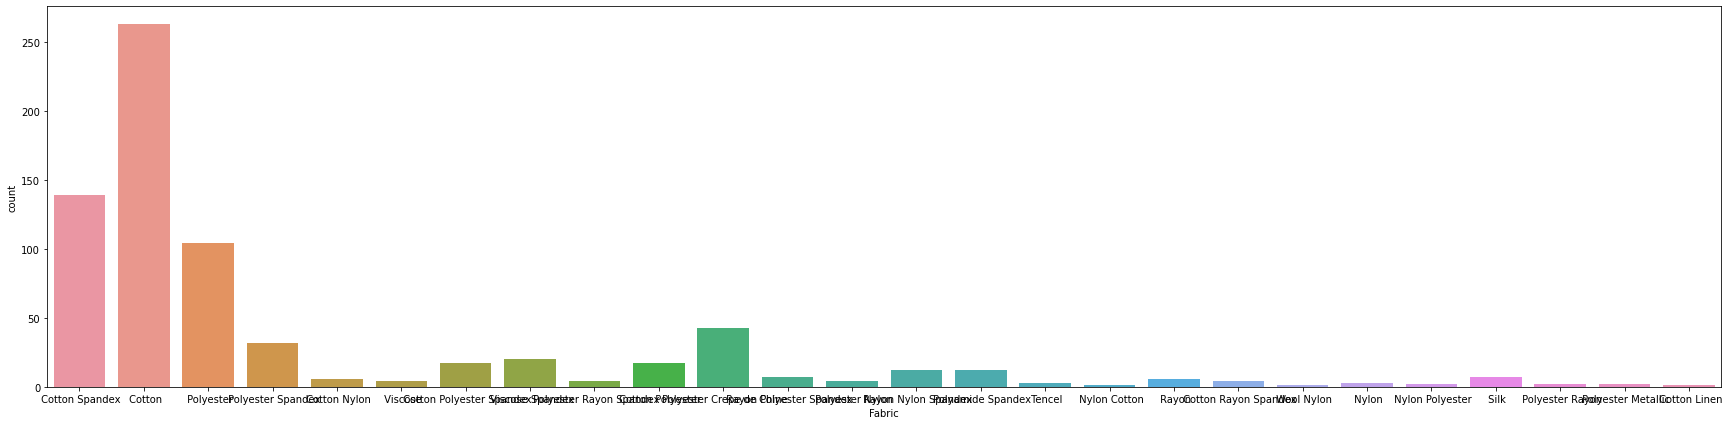

In [ ]:
# getting insights about the 'fabric' column

plt.figure(figsize=(30,7))
sns.countplot(df_pd.Fabric)

----- Type of fabric also determines the search result effectiveness as customers may want results based on the fabric of the cloth. We can observe from above that cotton, cotton spandex fabrics has higher counts compared to other fabric types. 

In [ ]:
# product performance data

df_pp.head()

,pId,pName,clicks,carts,orders
0,CL0034516,Chevron stripe colorblock maxi dress,29144,2181,204
1,CL0037085,Chevron stripe colorblock maxi dress,25892,237,70
2,CL0036758,Bird print pleated cotton knit dress,16343,340,97
3,CL0032310,Cotton knit fit and flare dress,16234,350,99
4,CL0037110,Pleat front chambray denim maxi dress,13317,229,56


In [ ]:
# basic detals about the data

df_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pId     2501 non-null   object
 1   pName   2501 non-null   object
 2   clicks  2501 non-null   int64 
 3   carts   2501 non-null   int64 
 4   orders  2501 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 97.8+ KB


In [ ]:
# query performance data

df_qp.head()

,query,hits,clicks,clickThroughs,ctr,carts,orders
0,pink,3971,330,93,2.34,18,0
1,Chambray,612,1360,447,73.04,145,8
2,gingham in green and white,601,0,0,0.00,0,0
3,white dresses,486,800,310,63.79,73,1
4,grey,480,89,28,5.83,10,0


In [ ]:
# basic detals about the data

df_qp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   query          500 non-null    object 
 1   hits           500 non-null    int64  
 2   clicks         500 non-null    int64  
 3   clickThroughs  500 non-null    int64  
 4   ctr            500 non-null    float64
 5   carts          500 non-null    int64  
 6   orders         500 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 27.5+ KB


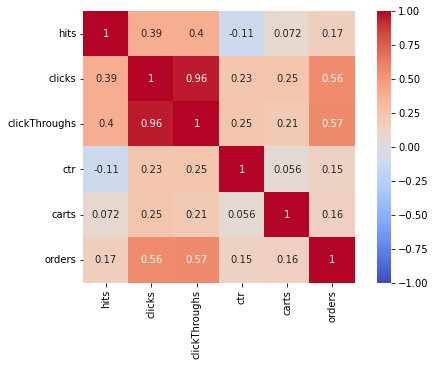

In [ ]:
# extracting correlation heatmap for query performance data

plt.figure(figsize=(8,5))
sns.heatmap(df_qp.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

#Cleaning product description data

In [ ]:
# The first character of each product name string is an empty space

df_pd['Product Name'][0]

' Ikat stripe print cotton knit dress'

In [ ]:
# Removing the empty space and replacing the 'Product Name' column value with correct text 

list_p = []
for i in list(df_pd['Product Name']):
  list_p.append(i[1:])

df_pd['Product Name'] = list_p

In [ ]:
df_pd['Product Name'][0]

'Ikat stripe print cotton knit dress'

#Creating a new data frame containing clicks , carts , orders for each product

In [ ]:
# renaming the column names so that we can merge the product description data and product performance data

df_pp.rename(columns = {'pId':'PID'}, inplace = True)

In [ ]:
# merging the data

df_new = pd.merge(df_pd, df_pp, on="PID")

In [ ]:
# Dataframe containing clicks, carts , orders for each product

df_new.head()

,PID,Product Name,Category,Final Price,Initial Price,Color,Primary Color,Fabric,pName,clicks,carts,orders
0,CL0036386,Ikat stripe print cotton knit dress,Dress,84.95,33.95,Blue/navy/white,Blue,Cotton Spandex,Ikat stripe print cotton knit dress,1846,43,15
1,CL0030567,Feminine pleated knit dress,Dress,59.95,41.95,Navy blue,Navy blue,Cotton Spandex,Feminine pleated knit dress,6882,242,56
2,CL0032320,Floral embellished chambray denim maxi dress,Dress,96.95,67.95,Deep indigo,Deep indigo,Cotton,Floral embellished chambray denim maxi dress,10680,72,27
3,CL0036700,Dot print cap sleeve shirt,Top,49.95,19.95,White/navy,White,Cotton,Dot print cap sleeve shirt,2051,59,24
4,CL0036365,Layered asymmetric hem hacci knit top,Top,69.95,27.95,Blue,Blue,Polyester,Layered asymmetric hem hacci knit top,4630,123,50


In [ ]:
# basic detals about the data

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 715
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            716 non-null    object 
 1   Product Name   716 non-null    object 
 2   Category       716 non-null    object 
 3   Final Price    716 non-null    float64
 4   Initial Price  716 non-null    float64
 5   Color          716 non-null    object 
 6   Primary Color  716 non-null    object 
 7   Fabric         716 non-null    object 
 8   pName          716 non-null    object 
 9   clicks         716 non-null    int64  
 10  carts          716 non-null    int64  
 11  orders         716 non-null    int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 72.7+ KB


In [ ]:
# dropping unimportant columns

df_new.drop(columns=['pName'],inplace=True)

In [ ]:
df_new.head()

,PID,Product Name,Category,Final Price,Initial Price,Color,Primary Color,Fabric,clicks,carts,orders
0,CL0036386,Ikat stripe print cotton knit dress,Dress,84.95,33.95,Blue/navy/white,Blue,Cotton Spandex,1846,43,15
1,CL0030567,Feminine pleated knit dress,Dress,59.95,41.95,Navy blue,Navy blue,Cotton Spandex,6882,242,56
2,CL0032320,Floral embellished chambray denim maxi dress,Dress,96.95,67.95,Deep indigo,Deep indigo,Cotton,10680,72,27
3,CL0036700,Dot print cap sleeve shirt,Top,49.95,19.95,White/navy,White,Cotton,2051,59,24
4,CL0036365,Layered asymmetric hem hacci knit top,Top,69.95,27.95,Blue,Blue,Polyester,4630,123,50


In [ ]:
# grouping the created data frame category wise and sorting them

category_df = df_new.groupby('Category')['clicks','carts','orders'].sum().sort_values(['clicks','carts','orders'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
category_df

,clicks,carts,orders
Category,,,
Dress,718466,14922,3991
Top,82008,2154,701
Skirt,55518,1590,396
Pant,23170,449,148
Jumpsuit,11006,148,31
Jacket,5768,158,42


----- We can observe from above that 'Dress' category has the most clicks, carts, orders.

In [ ]:
# grouping the created data frame color wise and sorting them

color_df = df_new.groupby('Primary Color')['clicks','carts','orders'].sum().sort_values(['clicks','carts','orders'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
color_df.head() 

,clicks,carts,orders
Primary Color,,,
Black,151332,3286,920
White,77134,1553,428
Deep navy,68913,1891,502
Off-white,65762,1019,282
Deep indigo,47702,1176,269


----- We can observe from above that black, white colored clothes have 
the most clicks, carts, orders.



In [ ]:
fabric_df = df_new.groupby('Fabric')['clicks','carts','orders'].sum().sort_values(['clicks','carts','orders'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
fabric_df.head()

,clicks,carts,orders
Fabric,,,
Cotton,445883,10319,2726
Cotton Spandex,179585,4653,1373
Polyester,97640,1561,433
Polyester Crepe de Chine,38444,659,161
Cotton Polyester,21436,294,75


----- We can observe from above that cotton , cotton spandex fabrics have the most clicks, carts, orders.

#Approach to improve the performance of the search queries

In [ ]:
# query performance data

df_qp.head()

,query,hits,clicks,clickThroughs,ctr,carts,orders
0,pink,3971,330,93,2.34,18,0
1,Chambray,612,1360,447,73.04,145,8
2,gingham in green and white,601,0,0,0.00,0,0
3,white dresses,486,800,310,63.79,73,1
4,grey,480,89,28,5.83,10,0




*   The 'query' column from above dataframe tells us about the searches made by the customers. 
*   To improve the performace of the search query we have to extract relevant data using keywords from the search query.
*   From all the data exploration we have done, we can say that the keywords can be the category, color, fabric of the product. We can also consider the price of the product. 




----- Lets understand what the customers are querying for, to get the appropriate results.

----- For this we can create a word cloud which generates the frequency of keywords which have been used in a search query.

----- Using the information generated from the word cloud, we can decide on the major keywords searched by the customers.




In [ ]:
# importing libraries

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# joining all the queries to generate a large corpus of keywords

text = "".join(review for review in df_qp['query'])

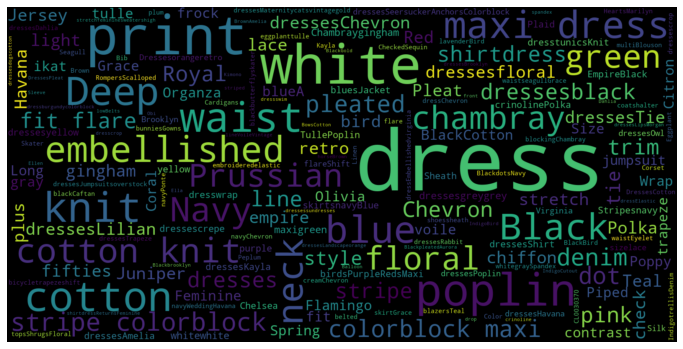

In [ ]:
# generating the word cloud

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



*   From above we can observe that the major keywords are 'dress' , 'white' , 'embellished' , 'cotton' etc. which decide the relevance of a search query. 
*   These keywords are the category, color, fabric of a particular product. Hence the possible approach would be to first give relevant weights to these keywords.
*  This is important because a person searching for clothes would first enter the category of clothes and then go with the color or fabric of the clothes. This can be other way around as well but we are considering the most probable situation judging by the word cloud from above.
*  We can provide weights such as 0.5-category , 0.3-color , 0.2-fabric. We can also add various other keywords like price , brand , size etc and give them relevant weights. Using this, a particular search query would get filtered based on the given weights to capture the relevance from the query.
* These are some of the steps i would consider, to better the search engine and get relevant search results.

